In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import argrelextrema

In [2]:
#задаём параметры, функцию гамма и саму систему из двух связных нейронов
a = 1
b = 3
c = 1
d = 5
x_r = -1.6
r = 0.01
s = 5
I = 4
v_s = 2
lambd = 10
Theta = -0.25

Gamma = lambda x_i: 1 / (1 + np.exp(-lambd * (x_i - Theta)))

def two_HRs(t, X, k1, k2, k):
    x1, y1, z1, x2, y2, z2  = X
    dx1 = y1 - a*x1**3 + b*x1**2 -z1 + I - k1*(x1 - v_s) * Gamma(x2) + k * (x2 - x1)
    dy1 = c - d*x1**2 - y1
    dz1 = r*(s*(x1 - x_r) - z1)
    
    dx2 = y2 - a*x2**3 + b*x2**2 -z2 + I - k2*(x2 - v_s) * Gamma(x1) + k * (x1 - x2)
    dy2 = c - d*x2**2 - y2
    dz2 = r*(s*(x2 - x_r) - z2)
    return [dx1, dy1, dz1, dx2, dy2, dz2]

In [3]:
###1
k1 = -0.17
k2 = -0.17
k = 0.0

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol1 = solve_ivp(two_HRs, [0, 200000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2, k))
ts1 = sol1.t
x1s1, y1s1, z1s1, x2s1, y2s1, z2s1 = sol1.y

In [14]:
np.save('ts1', ts1)
np.save('xsum1', xsum1)

In [22]:
ts1 = np.loadtxt('ts_200000.txt')
xsum1 = np.loadtxt('xsum_200000.txt')

In [5]:
# ts1 = np.array(ts1)
# x1s1 = np.array(x1s1)
# x2s1 = np.array(x2s1)

# xsum1 = x1s1 + x2s1

ts1 = ts1[120000:]
xsum1 = xsum1[120000:]

In [23]:
spikes_ind1 = argrelextrema(xsum1, np.greater) 
spikes1 = xsum1[spikes_ind1]

mu1 = np.mean(spikes1)

sigma1 = np.std(spikes1)

Hs1 = mu1 + 6*sigma1

print("Hs1  = ", Hs1)

Hs1  =  2.3305236973367625


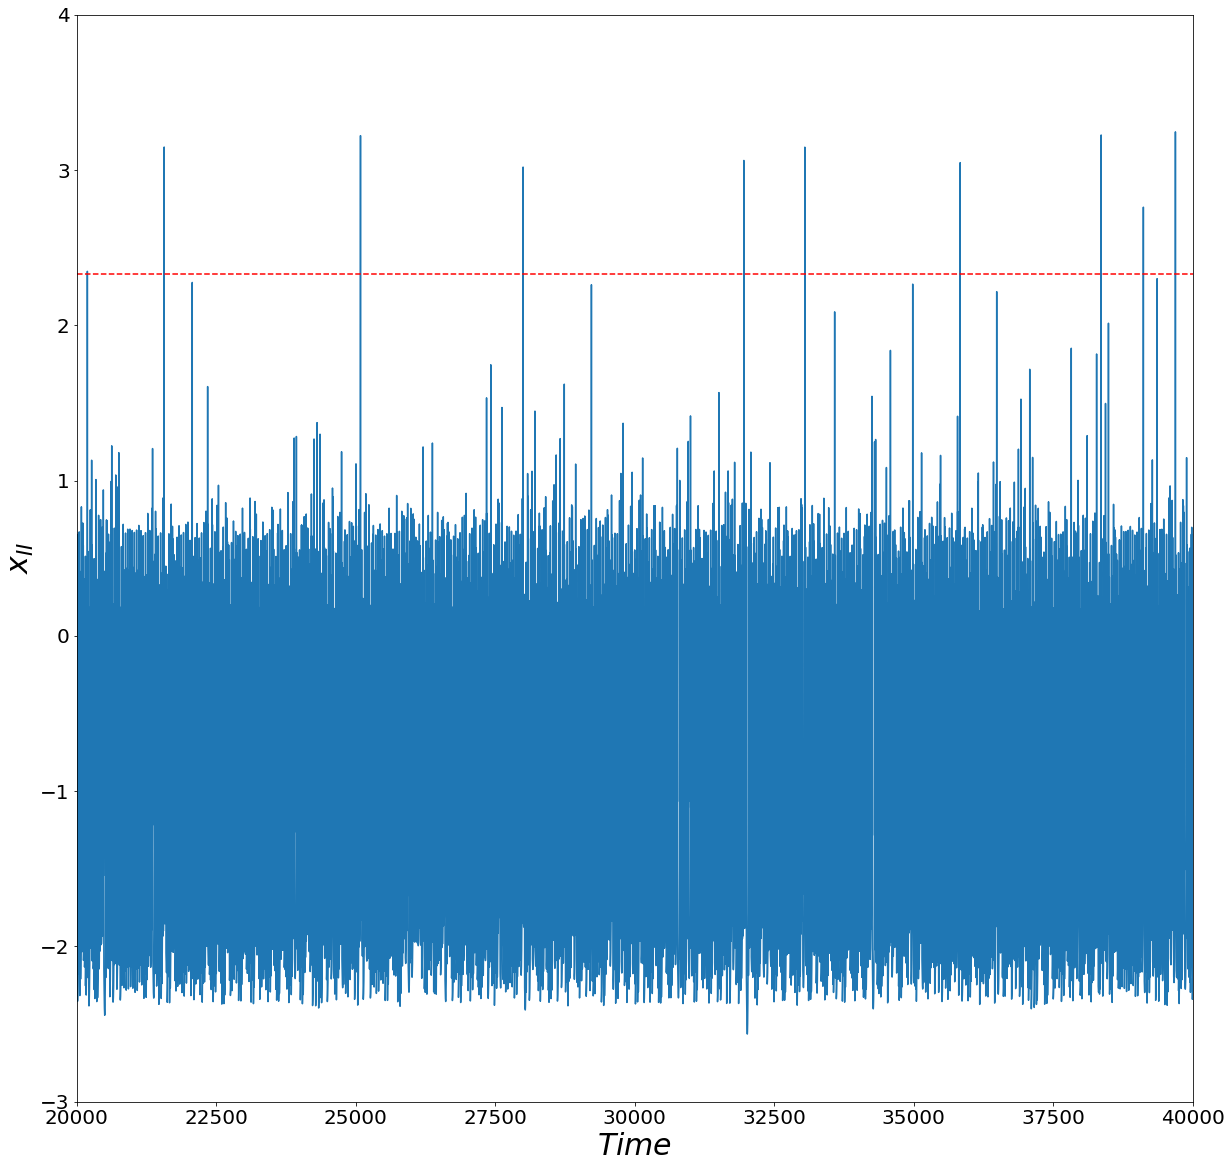

In [24]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(1, 1, 1)
ax.plot (ts1, xsum1)
ax.set_ylim(-3, 4) 
ax.set_xlim(20000, 40000)
plt.axhline(Hs1, color ="red", linestyle ="--")
ax.set_xlabel("$Time$", fontsize=30)
ax.set_ylabel("$x_{II}$", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show();

In [9]:
spikes1.size

13677

In [58]:
Hs = np.linspace(1.2, 4.0, 1000)
eps = 0.7

lents = len(ts1)
lenHs = len(Hs)

#ee_counter1 = np.array([((spikes1 >= Hs[j]) & (spikes1 < Hs[j]+eps)).sum() for j in range(lenHs)])
#ee_counter1 = np.array([((spikes1 >= Hs[j])).sum() for j in range(lenHs)])
ee_counter1 = np.array([((spikes1 >= Hs[j]) & (spikes1 < Hs[j+1])).sum() for j in range(lenHs-1)])

prob_arr1 = ee_counter1 / spikes1[spikes1>1.2].size


print(prob_arr1)



[0.01856148 0.00464037 0.01392111 0.00696056 0.00696056 0.00464037
 0.00928074 0.00464037 0.00464037 0.00464037 0.00696056 0.
 0.00928074 0.00464037 0.00696056 0.00928074 0.00464037 0.01856148
 0.00696056 0.00696056 0.00928074 0.01160093 0.01392111 0.00232019
 0.01856148 0.00464037 0.00928074 0.00696056 0.00696056 0.00464037
 0.         0.00928074 0.00232019 0.00696056 0.00696056 0.00232019
 0.00232019 0.00928074 0.00696056 0.         0.00928074 0.00464037
 0.00696056 0.01160093 0.00464037 0.00928074 0.0162413  0.00696056
 0.00928074 0.00232019 0.00232019 0.00464037 0.00232019 0.00232019
 0.00464037 0.00232019 0.         0.         0.00232019 0.00232019
 0.00464037 0.00696056 0.00232019 0.         0.         0.01392111
 0.         0.00696056 0.00232019 0.00232019 0.00696056 0.00464037
 0.00696056 0.00696056 0.00232019 0.00464037 0.00928074 0.00696056
 0.00232019 0.         0.00232019 0.00696056 0.         0.
 0.00232019 0.00232019 0.00464037 0.00232019 0.00696056 0.00464037
 0.00232019

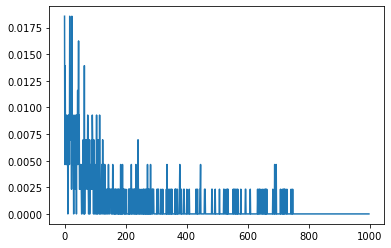

In [59]:
plt.plot(prob_arr1)

In [17]:
ee_counter1

array([104, 104, 104, ...,   0,   0,   0])

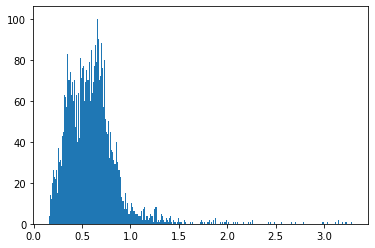

In [13]:
plt.hist(spikes1, 1000)
plt.show()

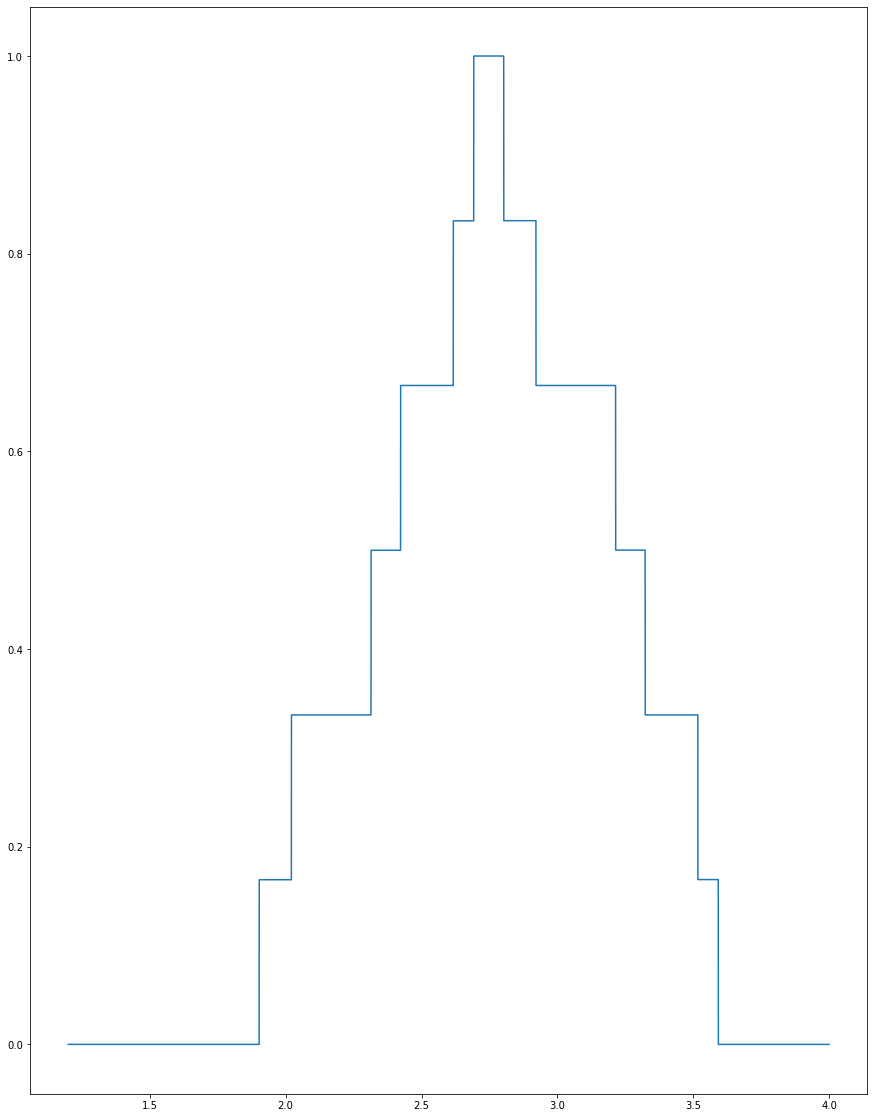

In [11]:
fig = plt.figure(figsize = (15, 20))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Hs, prob_arr1)
#ax.set_xscale('log')
#ax.set_yscale('log')

In [47]:
hist

array([9, 7, 5, 4, 3, 4, 5, 0, 5, 4, 6, 8, 4, 6, 8, 4, 8, 6, 4, 4, 3, 2,
       3, 4, 3, 5, 2, 4, 5, 5, 8, 6, 4, 2, 3, 1, 2, 1, 0, 2, 3, 3, 0, 6,
       1, 3, 2, 4, 4, 3, 4, 5, 1, 1, 3, 0, 1, 3, 4, 2, 3, 5, 2, 2, 3, 2,
       1, 3, 0, 1, 4, 1, 0, 3, 4, 1, 3, 2, 0, 2, 0, 3, 1, 2, 3, 1, 2, 1,
       3, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 0, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,

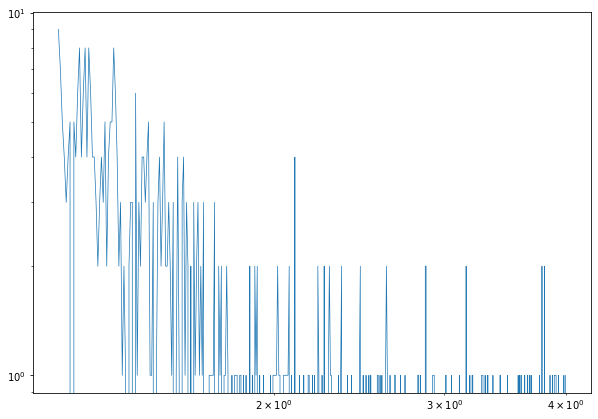

In [44]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
hist, bins = np.histogram(spikes1[spikes1>1.2], bins=500) 
ax.plot(np.linspace(1.2, 4.0, len(hist)), hist, lw = 0.7)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

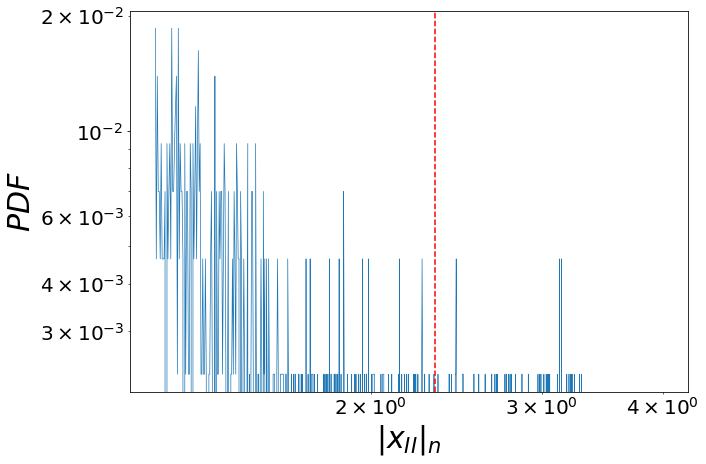

In [60]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Hs[:-1], prob_arr1, lw = 0.7)
plt.axvline(Hs1, color ="red", linestyle ="--")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$|x_{II}|_{n}$", fontsize=30)
ax.set_ylabel("$PDF$", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)


fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show();